# Old Overlay vs. new Overlay

In [1]:
import sys; sys.path.insert(0, '../'); sys.path.insert(0, '../analysis_notes/mupClassification/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
import seaborn as sns;sns.set(style="white", color_codes=True ,font_scale=2);
%matplotlib inline

In [2]:
MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()
cuts_pureff = apply_cuts_MCbnbDATAcosmic(PIDa_p_min=12,                                                                             
                         delta_Delta_phi=40,                         
                         r_max_RdQ_CC1p0pi=0.35)
pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers = cuts_pureff
pureff_MCbnbDATAcosmic

28828 pairs from MC-BNB + cosmic DATA overlay
18987 pairs in FV
5115 are 1mu-1p, 26.9%
4358 are other pairs, 23.0%
9514 are cosmic, 50.1%
--------------------------------------------------------------
2000 are CC 1p 0pi, 10.5%


,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.9%,100.0%,10.5%,no cut,100.0% (5115),100.0% (4358),100.0% (9514),100.0% (2000)
PIDa,87.9%,52.3%,86.0%,20.0%,${PID}_a>12$,87.9% (4497),57.9% (2523),16.6% (1578),86.0% (1719)
flash,82.8%,57.1%,80.6%,21.7%,optical filter,82.8% (4235),55.7% (2428),7.9% (750),80.6% (1612)
length,68.6%,66.7%,70.3%,26.8%,$l_{\mu}>l_{p}$,68.6% (3507),30.8% (1341),4.3% (410),70.3% (1407)
non-collinearity,63.1%,71.6%,67.6%,30.0%,"$|\theta_{1,2}-90^0|<60^0$",63.1% (3226),23.8% (1038),2.5% (240),67.6% (1352)
vertex activity,42.9%,75.0%,58.9%,40.3%,"$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<0...",42.9% (2192),14.0% (608),1.3% (123),58.9% (1178)
delta phi,29.9%,88.4%,52.0%,60.1%,$|\Delta \phi - \pi|<40^0$,29.9% (1527),3.7% (161),0.4% (40),52.0% (1039)
Pt no Delta phi,32.3%,83.1%,52.5%,52.9%,$p_{t}<0.35$ GeV/c,32.3% (1650),6.5% (282),0.6% (54),52.5% (1050)
soft Pt,25.9%,91.5%,47.5%,65.5%,$p_{t}<0.35$ GeV/c,25.9% (1326),2.2% (98),0.3% (25),47.5% (949)
tight Pt,13.4%,93.1%,26.9%,73.2%,$p_{t}<0.15$ GeV/c,13.4% (685),0.9% (41),0.1% (10),26.9% (539)


In [3]:
# ------------------------------------------------
# last edit:
# Oct. 13, 2017
def apply_cuts_to_old_overlay( PIDa_p_min=12
               , delta_theta_12=60  # deg.
               , delta_Delta_phi=40 # deg.
               , theta_pq_max=25    # deg.
               , Pt_max=0.33        # GeV/c
               , opt_box=(50,100) # [Nwires x Nticks]
               , r_max_RdQ_CC1p0pi = 0.32 # sphere in U,V,Y space, apply a cut only to CC1p0pi
               ):
    # --- -- --- - -- -- --- --
    reduced_OldMCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        reduced_OldMCbnbDATAcosmic[pair_type] = OldMCbnbDATAcosmicSamples[pair_type]
    #}
    reduced_OldMCbnbDATAcosmicSamples['no cut'] = reduced_OldMCbnbDATAcosmic

    # before cuts
    reduced_OldMCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_OldMCbnbDATAcosmicSamples['no cut'][pair_type]
        reduced_OldMCbnbDATAcosmic[pair_type] = sam
    #}
    reduced_OldMCbnbDATAcosmicSamples['no cut'] = reduced_OldMCbnbDATAcosmic

    # cut 1: PIDa
    cut_name , cut_label = 'PIDa','${PID}_a>%.0f$'%PIDa_p_min
    reduced_OldMCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_OldMCbnbDATAcosmicSamples['no cut'][pair_type]
        reduced_OldMCbnbDATAcosmic[pair_type] = sam[sam['PIDa_assigned_proton']>PIDa_p_min]
    #}
    reduced_OldMCbnbDATAcosmicSamples['PIDa'] = reduced_OldMCbnbDATAcosmic

    
    # cut 2: require that the longer track is the one with larger PIDa
    cut_name , cut_label = 'length', r'$l_{\mu}>l_{p}$'
    reduced_OldMCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_OldMCbnbDATAcosmicSamples['PIDa'][pair_type]
        reduced_OldMCbnbDATAcosmic[pair_type] = sam[sam['PIDa_long'] < sam['PIDa_short']]
    #}
    reduced_OldMCbnbDATAcosmicSamples['length'] = reduced_OldMCbnbDATAcosmic

    
    # cut 3: |\theta_{1,2}-90^0|<60^0$
    cut_name, cut_label='non-collinearity' ,'$|\theta_{1,2}-90^0|<%.0f^0$'%delta_theta_12
    reduced_OldMCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_OldMCbnbDATAcosmicSamples['length'][pair_type]
        reduced_OldMCbnbDATAcosmic[pair_type] = sam[np.abs(sam['theta_12']-90)<delta_theta_12]
    #}
    reduced_OldMCbnbDATAcosmicSamples['non-collinearity'] = reduced_OldMCbnbDATAcosmic


    # -- - -- -- - -- -- - - -- --- 
    # VERTEX ACTIVITY 
    # -- - -- -- - -- -- - - -- --- 
    # cut 6: vertex activity (RdQ)
    # for the 1mu-1p sample we do not apply a cut, which means that we stop here for 1mu-1p
    # for the CC 1p 0pi we apply a cut:
    # a sphere around RdQ=1 of radius r_min_RdQ_CC1p0pi
    # where r_min_RdQ_CC1p0pi is taken from analysis_notes/RdQ/RdQaroundVertex_cut_selection
    cut_name , cut_label = 'vertex activity' , '$\sqrt{\sum_{p=0,1,2}(R_{\Delta Q}^{p}-1)^2}<%.2f$'%r_max_RdQ_CC1p0pi
    box_str='[%d wires x %d ticks]'%(opt_box[0],opt_box[1])
    Ru = 'RdQaroundVertex[plane 0]'+box_str
    Rv = 'RdQaroundVertex[plane 1]'+box_str
    Ry = 'RdQaroundVertex[plane 2]'+box_str
    
    reduced_OldMCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{ 
        
        sam = reduced_OldMCbnbDATAcosmicSamples['non-collinearity'][pair_type]
        sam = sam[(sam[Ru]==1) | (sam[Rv]==1) | (sam[Ry]==1) 
                  | 
                  (np.sqrt( np.square(sam[Ru]-1) + np.square(sam[Rv]-1) + np.square(sam[Ry]-1) ) <= r_max_RdQ_CC1p0pi) ]
        reduced_OldMCbnbDATAcosmic[pair_type] = sam
    #}
    reduced_OldMCbnbDATAcosmicSamples['vertex activity'] = reduced_OldMCbnbDATAcosmic


    # $\Delta phi$
    reduced_OldMCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['vertex activity'][pair_type]
        reduced_OldMCbnbDATAcosmic[pair_type] = sam[np.abs(sam['delta_phi']-180.)<delta_Delta_phi]
    #}
    reduced_OldMCbnbDATAcosmicSamples['delta phi'] = reduced_OldMCbnbDATAcosmic



    # modified cut 6: $p_{t}<0.35$
    reduced_OldMCbnbDATAcosmic = dict()
    for pair_type in pair_types:#{
        sam = reduced_MCbnbDATAcosmicSamples['delta phi'][pair_type]
        reduced_OldMCbnbDATAcosmic[pair_type] = sam[sam['reco_Pt']<Pt_max]
    #}
    reduced_OldMCbnbDATAcosmicSamples['Soft Pt'] = reduced_OldMCbnbDATAcosmic


    return pureff_MCbnbDATAcosmic,pureff_MCbnbDATAcosmic_numbers,pureff_MCbnbMCcosmic,pureff_MCbnbMCcosmic_numbers
# ------------------------------------------------

In [4]:
# old overlay: prodgenie_bnb_nu_uboone_overlay_mcc8_reco2
OldMCbnbDATAcosmicSamples = dict()
def load_OldMCbnbDATAcosmicSamples():
    pairs = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/ccqe_candidates/prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_vertices.csv')
    OldMCbnbDATAcosmicPairsFV = sample_in_FV(pairs)
    print len(pairs),'pairs from MC-BNB + cosmic DATA overlay'
    print len(OldMCbnbDATAcosmicPairsFV),'pairs in FV'
    for pair_type in pair_types:#{
        OldMCbnbDATAcosmicSamples[pair_type] = OldMCbnbDATAcosmicPairsFV[OldMCbnbDATAcosmicPairsFV[pair_type]==True]
        Ntype = len(OldMCbnbDATAcosmicSamples[pair_type])
        if pair_type=='CC 1p 0pi': print_line()
        print Ntype,'are '+pair_type+', %.1f'%(100.*float(Ntype)/len(MCbnbDATAcosmicPairsFV))+'%'
    #}
    return OldMCbnbDATAcosmicPairsFV, OldMCbnbDATAcosmicSamples
# ------------------------------------------------

In [5]:
OldMCbnbDATAcosmicPairsFV, OldMCbnbDATAcosmicSamples = load_OldMCbnbDATAcosmicSamples()

50939 pairs from MC-BNB + cosmic DATA overlay
30377 pairs in FV
3814 are 1mu-1p, 20.1%
4001 are other pairs, 21.1%
22562 are cosmic, 118.8%
--------------------------------------------------------------
1234 are CC 1p 0pi, 6.5%


In [6]:
reduced_OldMCbnbDATAcosmicSamples=dict(dict())
cuts_pureff = apply_cuts_to_old_overlay(r_max_RdQ_CC1p0pi=0.33)

# comparisons

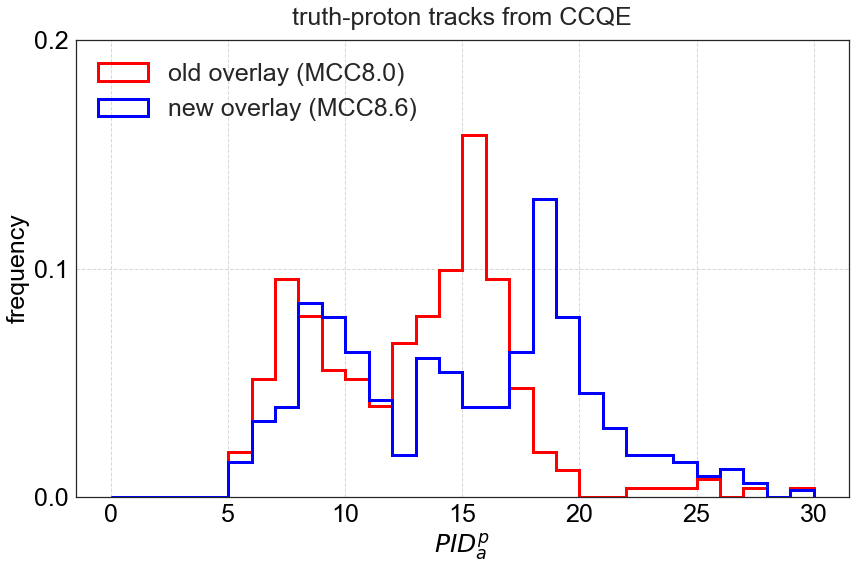

In [12]:
normed=1
cut_name = 'no cut'
# fig = plt.figure(figsize=(12,8))
# ax = fig.add_subplot(1,1,1)
# for i_pair,(pair_type,pair_label) in enumerate(zip(['CC 1p 0pi'] ,[r'CC1p0$\pi$ (MC)'])):
#     for sample,sample_label,color in zip([reduced_OldMCbnbDATAcosmicSamples[cut_name],reduced_MCbnbDATAcosmicSamples[cut_name]]                      
#                               ,['old overlay (MCC8.0)','new overlay (MCC8.6)']
#                               ,['red','blue']):
#         plt.hist(sample[pair_type]['PIDa_assigned_proton'],normed=normed
#                  ,bins=np.linspace(0,30,31),color=color,histtype='step',linewidth=3,label=sample_label);
#     set_axes(ax,r'$PID_a^{p}$',r'frequency',title='truth-proton tracks from CCQE',do_add_grid=True
#              ,do_add_legend=True,legend_loc='upper left'
#              ,yticks=[0,0.1,0.2]
#             )
# plt.tight_layout()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
for i_pair,(pair_type,pair_label) in enumerate(zip(['CC 1p 0pi'] ,[r'CC1p0$\pi$ (MC)'])):
    for sample,sample_label,color in zip([reduced_OldMCbnbDATAcosmicSamples[cut_name],reduced_MCbnbDATAcosmicSamples[cut_name]]                      
                              ,['old overlay (MCC8.0)','new overlay (MCC8.6)']
                              ,['red','blue']):
        sam = sample[pair_type][sample[pair_type]['l_assigned_proton']>50]
        plt.hist(sam['PIDa_assigned_proton'],normed=normed
                 ,bins=np.linspace(0,30,31),color=color,histtype='step',linewidth=3,label=sample_label);
    set_axes(ax,r'$PID_a^{p}$',r'frequency',title='truth-proton tracks from CCQE',do_add_grid=True
             ,do_add_legend=True,legend_loc='upper left'
             ,yticks=[0,0.1,0.2]
            )
plt.tight_layout()

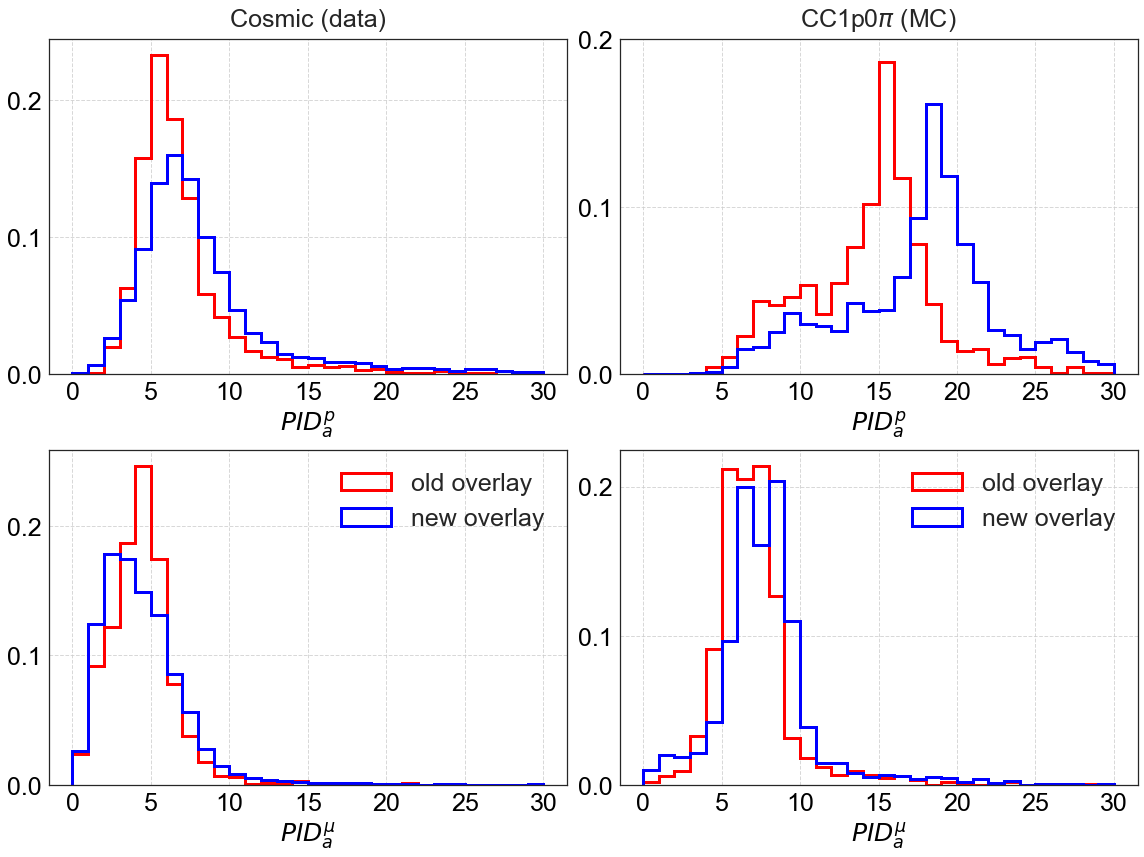

In [7]:
normed=1
cut_name = 'no cut'
fig = plt.figure(figsize=(16,12))

for i_pair,(pair_type,pair_label) in enumerate(zip(['cosmic' ,'CC 1p 0pi']                                          
                                                   ,['Cosmic (data)' ,r'CC1p0$\pi$ (MC)'])):
    ax = fig.add_subplot(2,2,i_pair+1)
    for sample,sample_label,color in zip([reduced_OldMCbnbDATAcosmicSamples[cut_name],reduced_MCbnbDATAcosmicSamples[cut_name]]                      
                              ,['old overlay','new overlay']
                              ,['red','blue']):
        plt.hist(sample[pair_type]['PIDa_assigned_proton'],normed=normed
                 ,bins=np.linspace(0,30,31),color=color,histtype='step',linewidth=3,label=sample_label);
    set_axes(ax,r'$PID_a^{p}$',title=pair_label,do_add_grid=True
             ,yticks=[0,0.1,0.2]
            )
    
    ax = fig.add_subplot(2,2,i_pair+3)
    for sample,sample_label,color in zip([reduced_OldMCbnbDATAcosmicSamples[cut_name],reduced_MCbnbDATAcosmicSamples[cut_name]]                      
                              ,['old overlay','new overlay']
                              ,['red','blue']):
        plt.hist(sample[pair_type]['PIDa_assigned_muon'],normed=normed
                 ,bins=np.linspace(0,30,31),color=color,histtype='step',linewidth=3,label=sample_label);
    set_axes(ax,r'$PID_a^{\mu}$',do_add_legend=True,do_add_grid=True
             ,yticks=[0,0.1,0.2]
            )
    
plt.tight_layout()

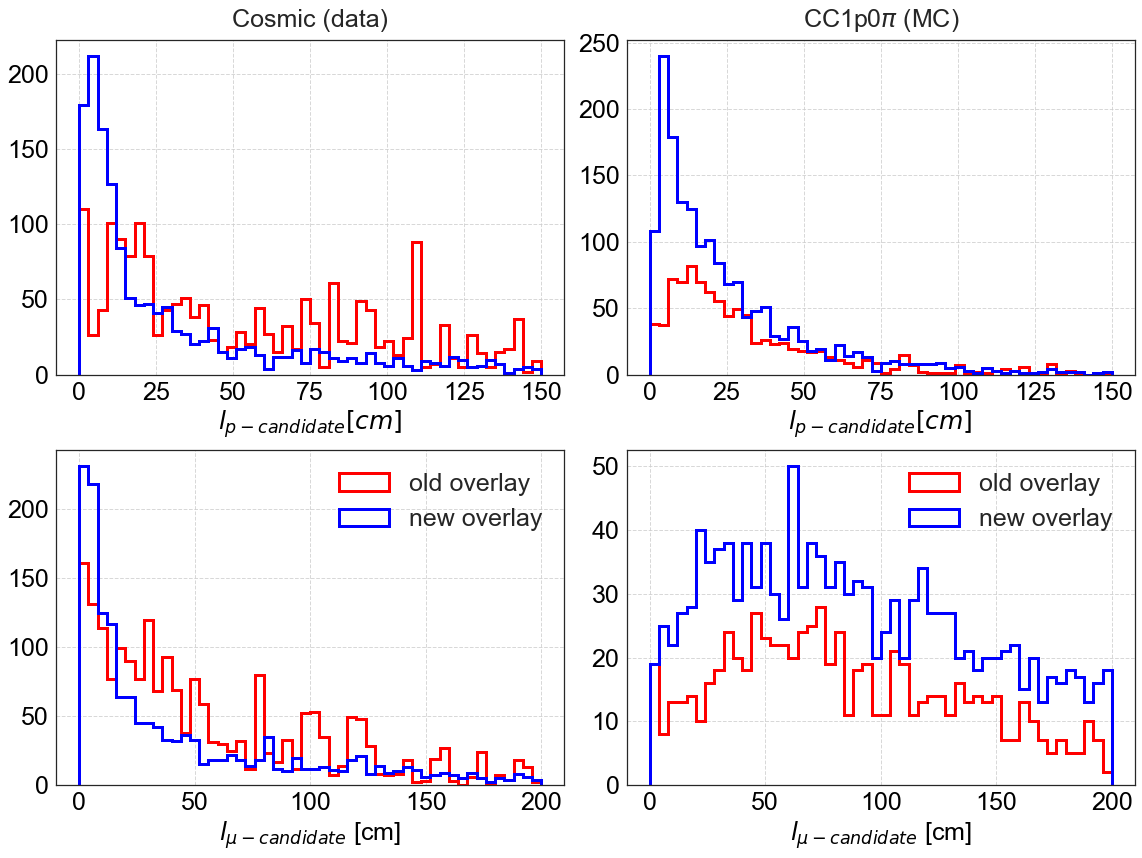

In [26]:
normed=None
cut_name = 'PIDa'
fig = plt.figure(figsize=(16,12))

for i_pair,(pair_type,pair_label) in enumerate(zip(['cosmic' ,'CC 1p 0pi']                                          
                                                   ,['Cosmic (data)' ,'CC1p0$\\pi$ (MC)'])):
    ax = fig.add_subplot(2,2,i_pair+1)
    for sample,sample_label,color in zip([reduced_OldMCbnbDATAcosmicSamples[cut_name],reduced_MCbnbDATAcosmicSamples[cut_name]]                      
                              ,['old overlay','new overlay']
                              ,['red','blue']):
        plt.hist(sample[pair_type]['l_assigned_proton'],normed=normed
                 ,bins=np.linspace(0,150,51),color=color,histtype='step',linewidth=3,label=sample_label);
    set_axes(ax,r'$l_{p-candidate} [cm]$',title=pair_label,do_add_grid=True
#              ,yticks=[0,0.02,0.06]
            )       
    
    ax = fig.add_subplot(2,2,i_pair+3)
    for sample,sample_label,color in zip([reduced_OldMCbnbDATAcosmicSamples[cut_name],reduced_MCbnbDATAcosmicSamples[cut_name]]                      
                              ,['old overlay','new overlay']
                              ,['red','blue']):
        plt.hist(sample[pair_type]['l_assigned_muon'],normed=normed
                 ,bins=np.linspace(0,200,51),color=color,histtype='step',linewidth=3,label=sample_label);
    set_axes(ax,r'$l_{\mu-candidate}$ [cm]',do_add_legend=True,do_add_grid=True
#              ,yticks=[0,0.02,0.06]
            )
    
plt.tight_layout()